# ROC Curve, AUC

<img src="files/roc_curve.jpeg">

In [15]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [16]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [17]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [19]:
# calculate score
lr_auc = roc_auc_score(testy, lr_probs)
# summarize score
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curve
lr_fpr, lr_tpr = roc_curve(testy, lr_probs)

Logistic: ROC AUC=0.903


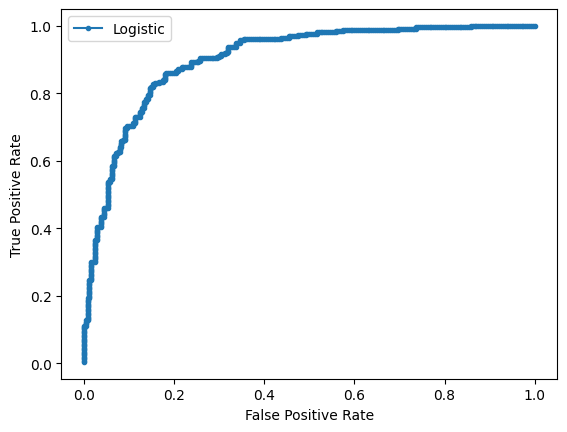

In [20]:
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Homework

implement roc_auc_score and roc_curve functions on your own

In [10]:
import numpy as np

In [18]:
def roc_auc_score(testy, lr_probs):
    thresholds = np.sort(np.unique(lr_probs))[::-1]
    n_pos = np.sum(testy)
    n_neg = len(testy) - n_pos
    tpr = []
    fpr = []
    for threshold in thresholds:
        y_pred = lr_probs >= threshold
        tp = np.sum(np.logical_and(y_pred, testy))
        fp = np.sum(np.logical_and(y_pred, np.logical_not(testy)))
        tpr.append(tp / n_pos)
        fpr.append(fp / n_neg)

    auc = np.trapz(tpr, fpr)
    return auc

def roc_curve(testy, lr_probs):
    thresholds = np.sort(np.unique(lr_probs))[::-1]
    n_pos = np.sum(testy)
    n_neg = len(testy) - n_pos
    tpr = []
    fpr = []
    for threshold in thresholds:
        y_pred = lr_probs >= threshold
        tp = np.sum(np.logical_and(y_pred, testy))
        fp = np.sum(np.logical_and(y_pred, np.logical_not(testy)))
        tpr.append(tp / n_pos)
        fpr.append(fp / n_neg)

    return fpr, tpr